# Data Mining

## Part 1

### Classification
Operational principles: Classification methods for data mining categorize items into defined categories. They use the characteristics of a sample dataset to train the model and determine which category each item is represented in. This knowledge is used to classify new items (unseen data) in those categories using various algorithms such as decision trees or neuro networks. 

Strengths: Classification is a powerful tool for dividing large data set. Here are some common uses: email spam detection, and segmentation of customers in marketing. Its capable of handling many types of data and is not difficult to interpret.

Weaknesses: A classification model can seem perfect, but works poorly on unseen data. This is called overfitting. In addition, it must contain a significant amount of labelled information for training and can be distorted. 

Example: Classification in the healthcare sector can be useful. For instance, one can be identified as being at risk from a specific disease..The dataset might include patient records with historical health data, lab results, and previous diagnoses.

### Prediction

How this works: Prediction is widely useful in every category of life. The model learn to recongize patterns. In order to predict continuous results or more complex algorithms the model often uses regression techniques.

Strengths: In order to identify trends that could not be detected manually, it is capable of processing and analysing vast amounts of data.

Weaknesses: The predictive models are as good as the data they're trained on, and if there is a change in underlying data patterns over time, it could make them less accurate.

Example: The use of retail sales data by retailers to predict demand for new products is an example of predicting in a real life database.


## Part 2
Problem Statement: Develop a predictive model for determining the likelihood of clients subscribing to a term deposit based on direct marketing campaign data, specifically phone calls. The goal is to accurately classify whether a client will subscribe to a term deposit (represented by the variable 'y'). Evaluate the performance of the k-nearest neighbors (kNN) and support vector machine (SVM) models by measuring their accuracy in predicting subscription outcomes using the provided test dataset.

The purpose of this project is build a classifier on 2 or 3 models (kNN, SVM, or Decision Tree)

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

https://archive.ics.uci.edu/dataset/222/bank+marketing


### Algorthims Used


#### k-Nearest Neighbors (kNN):
   - kNN finds the class of a data point by looking at the majority class among its k nearest neighbors.
   - No explicit mathematical equation is used during training. It relies on computing distances between data points and finding the most common class label among the nearest neighbors.

#### Support Vector Machine (SVM):
   - SVM finds the best line or hyperplane that separates different classes in the feature space.
   - It aims to maximize the margin between the classes, which is the distance between the nearest data points (support vectors) and the decision boundary.
   - SVM involves solving an optimization problem to find this optimal boundary

### Import Libraries


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.utils import shuffle, resample
from sklearn.metrics import roc_curve, auc
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# Encode categorical variables
from sklearn.calibration import LabelEncoder



### Load the Data

In [3]:
# Load the dataset
file_path = 'bank-full.csv'
data = pd.read_csv(file_path, delimiter=';')

# Display the first few rows of the dataset
print(data.head())

print(data['y'].value_counts())  


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
y
no     39922
yes     5289
Name: count, dtype: int64


### Data Preprocessing and Subset

In [4]:
label_encoders = {}  # Store label encoders for each column for possible inverse transformation
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Separate features and target variable
X = data.drop('y', axis=1)
y = data['y']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# Display the shapes of X and y to verify
print(f'Shape of X (features): {X.shape}')
print(f'Shape of y (target): {y.shape}')



Shape of X (features): (45211, 16)
Shape of y (target): (45211,)


### Traning and Testing Data

In [5]:
# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

### Finding the Optimal K value for kNN Classification
The optimal k value we found was 2, so this code was commented out to decrease runtime

In [6]:
# Define a range of k values to try
k_values = range(1, 33)

# Initialize an empty list to store mean cross-validation scores for each k
cv_scores = []

# Iterate over each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Perform cross-validation with 5 folds
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    # Calculate mean accuracy score across folds
    cv_scores.append(scores.mean())

# Find the optimal k value with the highest cross-validation score
optimal_k = k_values[np.argmax(cv_scores)]
print("Optimal k value:", optimal_k)


Optimal k value: 2


### Building Classification Model

In [7]:
# Initialize and fit the kNN classifier
num_Neighbors = 2
knn = KNeighborsClassifier(n_neighbors = num_Neighbors)
knn.fit(X_train, y_train)

# Initiliazing the SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)


SVC(kernel='linear')

### Model Predictions

In [8]:
knn_predictions = knn.predict(X_test)
svm_predictions = svm.predict(X_test)
# Print out accuracy of kNN model
print("Accuracy of kNN model at K=", num_Neighbors," is",metrics.accuracy_score(y_test, knn_predictions))
# Print out the accuracy of the SVM model
print(f"Accuracy of SVM model is {metrics.accuracy_score(y_test, svm_predictions)}")


Accuracy of kNN model at K= 2  is 0.9458951718955476
Accuracy of SVM model is 0.8118855282109086


### Classification Results



In [9]:
# kNN Evaluation
print("kNN Classification Report:")
print(classification_report(y_test, knn_predictions))
print("kNN Accuracy Score:", accuracy_score(y_test, knn_predictions))

# SVM Evaluation
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_predictions))
print("SVM Accuracy Score:", accuracy_score(y_test, svm_predictions))


kNN Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      7908
           1       0.92      0.98      0.95      8061

    accuracy                           0.95     15969
   macro avg       0.95      0.95      0.95     15969
weighted avg       0.95      0.95      0.95     15969

kNN Accuracy Score: 0.9458951718955476

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      7908
           1       0.80      0.83      0.82      8061

    accuracy                           0.81     15969
   macro avg       0.81      0.81      0.81     15969
weighted avg       0.81      0.81      0.81     15969

SVM Accuracy Score: 0.8118855282109086


### Confusion Matrix

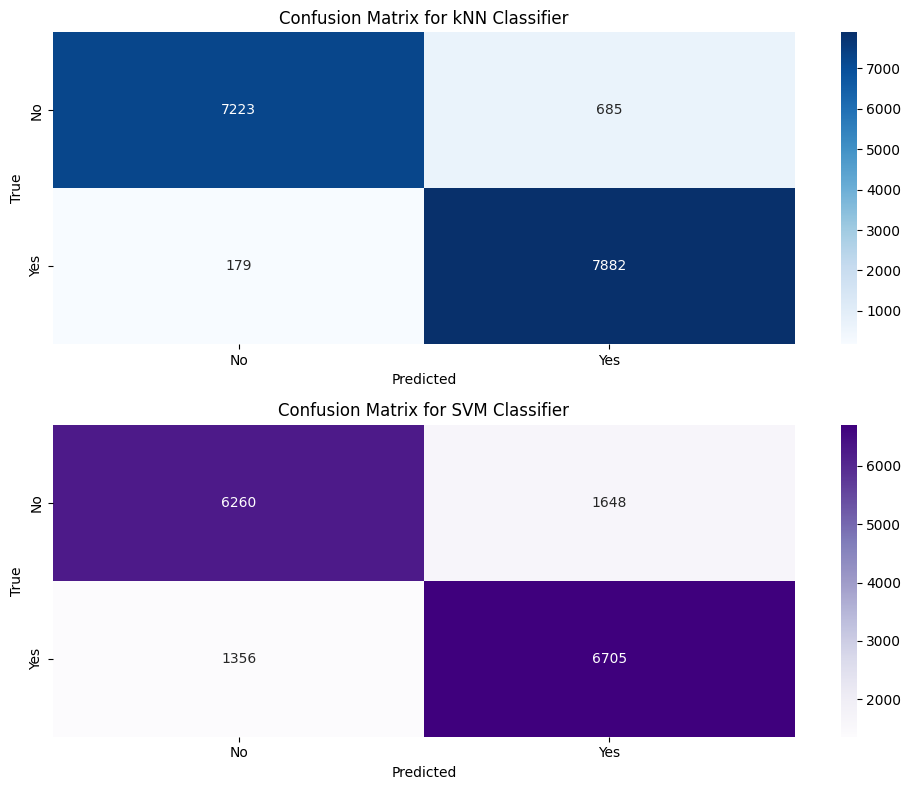

In [10]:
# kNN Confusion Matrix
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
sns.heatmap(confusion_matrix(y_test, knn_predictions), annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for kNN Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')


# SVM Confusion Matrix
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt='d', cmap='Purples', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for SVM Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

# Fixes layout overlapping
plt.tight_layout()
plt.show()

###  Accuracy, Sensitivity, and Specificity

In [11]:
def calculate_sensitivity_specificity(y_true, y_pred):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # True positives are at index [1, 1]
    true_positive = cm[1][1]
    # True negatives are at index [0, 0]
    true_negative = cm[0][0]
    # False negatives are at index [1, 0]
    false_negative = cm[1][0]
    # False positives are at index [0, 1]
    false_positive = cm[0][1]
    
    # Sensitivity is true positives over the sum of true positives and false negatives
    sensitivity = true_positive / (true_positive + false_negative)
    # Specificity is true negatives over the sum of true negatives and false positives
    specificity = true_negative / (true_negative + false_positive)
    
    return sensitivity, specificity

# Assuming y_pred_knn and y_pred_svm are the predictions from KNN and SVM respectively
sensitivity_knn, specificity_knn = calculate_sensitivity_specificity(y_test, knn_predictions)
sensitivity_svm, specificity_svm = calculate_sensitivity_specificity(y_test, svm_predictions)
# kNN Evaluation
accuracy_score_knn = accuracy_score(y_test, knn_predictions)
accuracy_score_svm = accuracy_score(y_test, svm_predictions)
print(f"kNN Accuracy Score: {accuracy_score_knn}, KNN Sensitivity: {sensitivity_knn}, KNN Specificity: {specificity_knn}")
print(f"SVM Accuracy Score: {accuracy_score_svm}, SVM Sensitivity: {sensitivity_svm}, SVM Specificity: {specificity_svm}")

kNN Accuracy Score: 0.9458951718955476, KNN Sensitivity: 0.9777943183227887, KNN Specificity: 0.9133788568538189
SVM Accuracy Score: 0.8118855282109086, SVM Sensitivity: 0.831782657238556, SVM Specificity: 0.7916034395548811


#### Accuracy:

kNN: Inidicates that the kNN model correctly predicts whether a client will subscribe to a bank term deposit about 94% of the time

SVM: Inidicates that the SVM model correctly predicts whether a client will subscribe to a bank term deposit about 81% of the time

#### Sensitivity (True Positive Rate):

 kNN sensitivity: 0.97 If the actual value is positive, the kNN model correctly identifies it as positive approximately 97% of the time. This is relatively high, suggesting that the kNN model is very efficient in identifying all positive cases. 
 
 SVM sensitivity: 0.832 If the actual value is positive, about 83% of the time an SVM model correctly calculates that value to be positive.

#### Specificity (True Negative Rate):

 KNN Specificity: 0.91 When the true value is negative, approximately 91% of the time a kNN model correctly identifies it to be negative. This is very high, indicating that the kNN model does a good job of identifying negative events. 
 
 SVM Specificity: 0.792 When the real value is positive, almost 79% of the time a SVM model will correctly identify it as negatively.

 

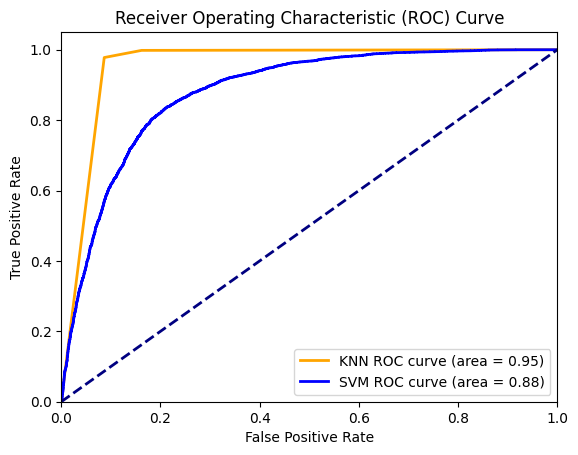

In [12]:
# Compute predicted probabilities for KNN
knn_probabilities = knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_probabilities)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Compute decision function or predicted probabilities for SVM
svm_scores = svm.decision_function(X_test)  # Use decision_function or predict_proba depending on your SVM model

# Compute ROC curve and ROC area for SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_scores)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot the ROC curve for KNN
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='orange', lw=2, label='KNN ROC curve (area = %0.2f)' % roc_auc_knn)

# Plot the ROC curve for SVM
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='SVM ROC curve (area = %0.2f)' % roc_auc_svm)

# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Display the plot
plt.show()


### ROC Evaluation
This ROC Curve included the kNN roc curve and the SVM roc curve.

The area under the curve point to how well the model is at segregating and classifying. The auc ranges from 0 to 1. Both classifiers are performing well, but the kNN is preforming better than the SVM. 

The roc curve shows that as the threshold increases, the false positive rate decrease. This also comes at the cost of the true positive rate though. 

The kNN curve is closer to the top-left corner which means that the kNN classifier has a higher true positive rate for the same false positive rate, or a lower false positive rate for the same true positive rate. 

### Learning Curve Model

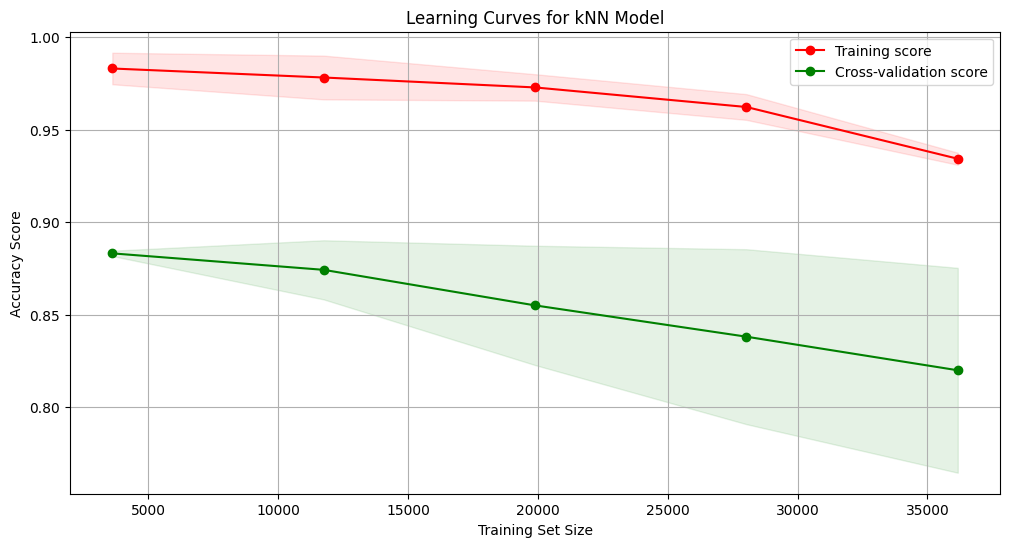

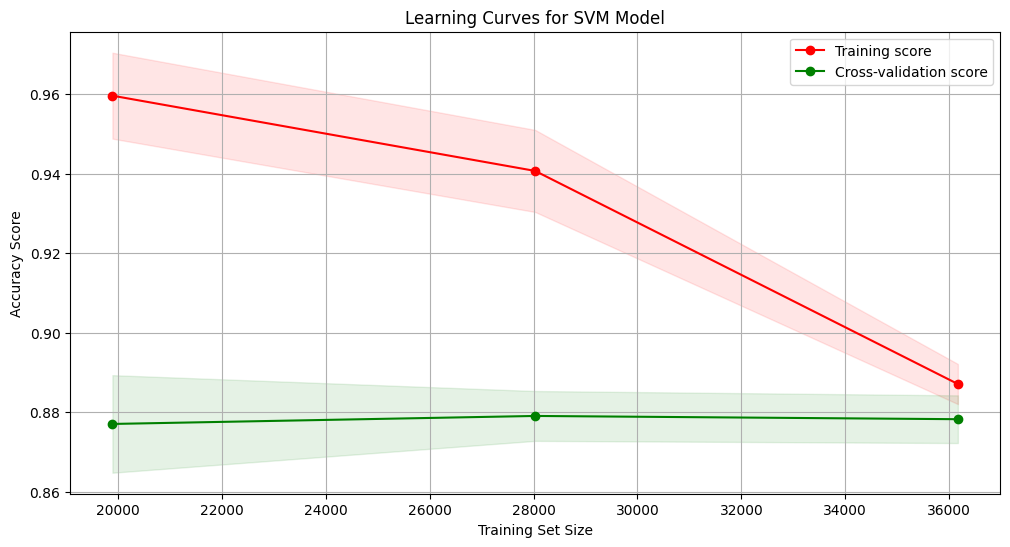

In [13]:

def plot_learning_curve(model, X, y, title):
    """
    This function plots the learning curves of a given model.

    Parameters:
    - model: The machine learning model to evaluate.
    - X: Features dataset.
    - y: Target dataset.
    - title: Title for the plot.
    """

    # Generate learning curves
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(.1, 1.0, 5))

    # Calculate the average and standard deviation of the training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curves
    plt.figure(figsize=(12, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.title(title)
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score')
    plt.legend(loc="best")
    plt.grid(True)

# Plot learning curves for kNN
plot_learning_curve(knn, X_scaled, y, title='Learning Curves for kNN Model')

# Plot learning curves for SVM
plot_learning_curve(svm, X_scaled, y, title='Learning Curves for SVM Model')


### Comparison

Overall, the accuracy and specificity of both models are high, but their sensitivity is relatively low. It means they're pretty good at identifying negative class clients who won't subscribe, but they're not so good at identifying positive class clients who will subscribe. The sensitivity of the models may need to be improved, depending on the business objective, possibly at the expense of reducing their specificity if there is a high cost for missing potential subscribers. 

The ROC curve from the knn and svm model are relatively similar with the svm slightly overpowering the knn model. THis means that the SVM curve is closer to the top-left corner which means that the SNM classifier has a higher true positive rate for the same false positive rate.

The learning model seems to indicate that kNN model tends to decrease in accuracy as the data increases while the SVM stays the same. 

### Conclusions

Initalially, Hunter and Jack did not balance the dataset which significantally screwed our model. After the improvement, our model seemed to improve drastically. Both models have a high accuracy, sensitivity, and secificity scores. in addition to this, our confusion matrix is looking beautiful. Our models are correctly indentifying true and negative results. 

All in all, our model correctly identifies- with high accuracy- if the client will subsrcibe to a term deposit or not. 

### Refrences


https://towardsdatascience.com/knn-in-python-835643e2fb53

https://towardsdatascience.com/knn-visualization-in-just-13-lines-of-code-32820d72c6b6